## Observations and Insights 

In [1]:
# Dependencies and Setup
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
miceCount = df["Mouse ID"].nunique()
miceCount

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#new_df = df.groupby(["Mouse ID", "Timepoint"]).ngroups
#df.loc[:, ["Mouse ID", "Timepoint"]].drop_duplicates()
duplicated_df = df[df.duplicated(['Mouse ID','Timepoint'])]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_df["Mouse ID"].nunique()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen
summary_group = new_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["count","mean", "median","std", "sem"]})
summary_group

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                          count       mean     median       std       sem
Drug Regimen                                                             
Capomulin                   230  40.675741  41.557809  4.994774  0.329346
Ceftamin                    178  52.591172  51.776157  6.268188  0.469821
Infubinol                   178  52.884795  51.820584  6.567243  0.492236
Ketapril                    188  55.235638  53.698743  8.279709  0.603860
Naftisol                    186  54.331565  52.509285  8.134708  0.596466
Placebo                     181  54.033581  52.288934  7.821003  0.581331
Propriva                    156  52.393463  50.909965  6.568014  0.525862
Ramicane                    228  40.216745  40.673236  4.846308  0.320955
Stelasyn                    181  54.233149  52.431737  7.710419  0.573111
Zoniferol                   182  53.236507  51.818479  6.966589  0.516398

## Bar Plots

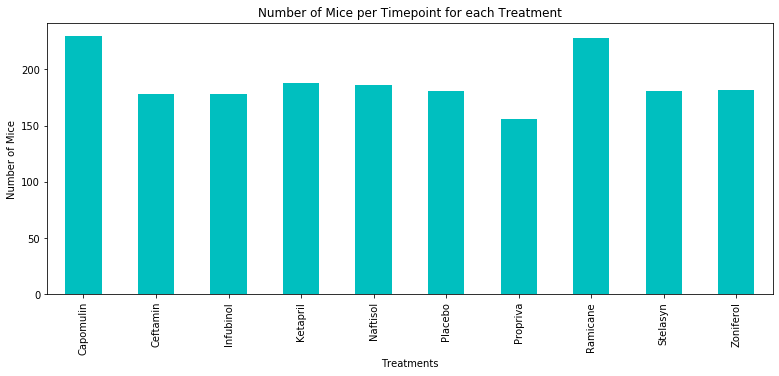

<Figure size 432x288 with 0 Axes>

In [99]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study
# using pandas.

time_and_drugs = new_df.groupby("Drug Regimen")["Mouse ID"].count()
time_and_drugs.plot(kind="bar",figsize=(13,5), color = "c")
#time_and_drugs
plt.title("Number of Mice per Timepoint for each Treatment")
plt.xlabel("Treatments")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pyplot.

drug_group = new_df.groupby("Drug Regimen")
drug_type = [list[0] for list in drug_group["Drug Regimen"].unique()]

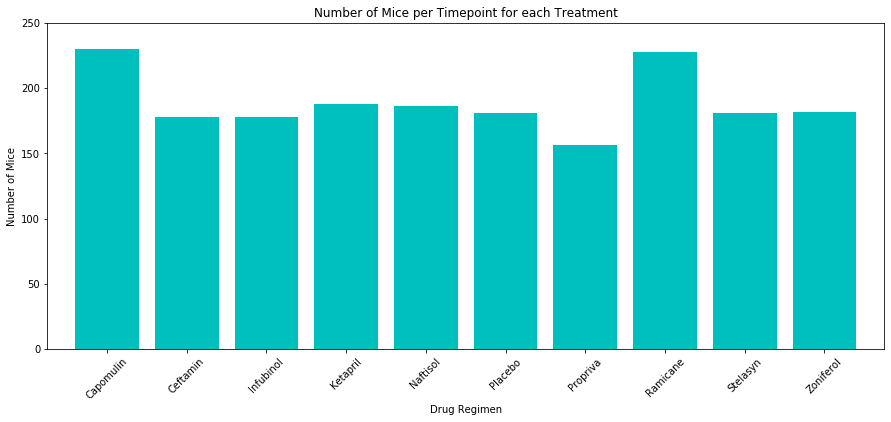

In [100]:
x_axis = np.arange(len(time_and_drugs))
y_axis = time_and_drugs
plt.figure(figsize=(15,6))
plt.bar(x_axis, y_axis, color='c', align = "center")
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_type, rotation="45")
plt.title("Number of Mice per Timepoint for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(time_and_drugs)+20)

plt.savefig("../Images/BarChart.png")
plt.show()

## Pie Plots

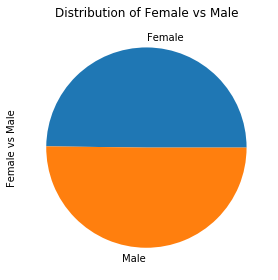

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = new_df.groupby(["Sex"])
sex_count = sex_group["Mouse ID"].nunique()

sex_list = [list[0] for list in sex_group["Sex"].unique()]

sex_pie = sex_count.plot(kind="pie", y=sex_list, title="Distribution of Female vs Male")
sex_pie.set_ylabel("Female vs Male")

plt.tight_layout()
plt.savefig("../Images/PieChart.png")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
